# Predicting customer churn in telecom industry


In [35]:
# Importing the required libraries

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

## Loading the data in the dataframe

In [36]:
pd.set_option('display.max_columns',250)
telecom_df = pd.read_csv("telecom_churn_data.csv")

In [37]:
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [38]:
telecom_df.shape

(99999, 226)

# Filtering the high value customers

Definition: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)



In [39]:
#Identifying the columns with recharge information
telecom_recharge_cols = [col for col in telecom_df.columns if 'rech_' in col]
print(telecom_recharge_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


#### Notes:
- Columns starting with total_rech_amt_* indicates the total amount recharged for non-data usage
- Columns starting with total_rech_data_* indicates the total data recharged for data usage
- Columns starting with av_rech_amt_data_* indicates the average amount recharged for data usage
- Net recharge amount for a given month (for e.g month 6) is given by:

   `net_recharge_amt_6 = total_rech_amt_6 + (total_rech_data_6 * av_rech_amt_data_6)`


In [40]:
#Columns required for calculating the net recharge amount for months 6 & 7

recharge_cols = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9',
                 'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']


In [41]:
telecom_df[recharge_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
total_rech_amt_6      99999 non-null int64
total_rech_amt_7      99999 non-null int64
total_rech_amt_8      99999 non-null int64
total_rech_amt_9      99999 non-null int64
total_rech_data_6     25153 non-null float64
total_rech_data_7     25571 non-null float64
total_rech_data_8     26339 non-null float64
total_rech_data_9     25922 non-null float64
av_rech_amt_data_6    25153 non-null float64
av_rech_amt_data_7    25571 non-null float64
av_rech_amt_data_8    26339 non-null float64
av_rech_amt_data_9    25922 non-null float64
dtypes: float64(8), int64(4)
memory usage: 9.2 MB


#### Notes
- total_rech_data_* and av_rech_amt_data_* columns have null values 
- We decide to replace them with 0 values so that the net recharge amount can be calculated

In [42]:
#Calculating the net recharge amount for all the 4 months

telecom_df['total_recharge_data_amt_6'] = telecom_df['total_rech_data_6'].fillna(0) * telecom_df['av_rech_amt_data_6'].fillna(0)

telecom_df['total_recharge_data_amt_7'] = telecom_df['total_rech_data_7'].fillna(0) * telecom_df['av_rech_amt_data_7'].fillna(0)

telecom_df['total_recharge_data_amt_8'] = telecom_df['total_rech_data_8'].fillna(0) * telecom_df['av_rech_amt_data_8'].fillna(0)

telecom_df['total_recharge_data_amt_9'] = telecom_df['total_rech_data_9'].fillna(0) * telecom_df['av_rech_amt_data_9'].fillna(0)



telecom_df['net_recharge_amt_6'] = telecom_df['total_rech_amt_6'] + telecom_df['total_recharge_data_amt_6']

telecom_df['net_recharge_amt_7'] = telecom_df['total_rech_amt_7'] + telecom_df['total_recharge_data_amt_7']

telecom_df['net_recharge_amt_8'] = telecom_df['total_rech_amt_8'] + telecom_df['total_recharge_data_amt_8']

telecom_df['net_recharge_amt_9'] = telecom_df['total_rech_amt_9'] + telecom_df['total_recharge_data_amt_9']



In [43]:
#Calculating the average recharge amounts for the 2 months
telecom_df['avg_rech_amt_6_7'] = (telecom_df['net_recharge_amt_6']  + telecom_df['net_recharge_amt_7'])/2

In [44]:
##Calculating the 70th percentile of the average recharge amount in the first 2 months
telecom_df["avg_rech_amt_6_7"].describe(percentiles=[.25,.5,.70,.90,.95,.99])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
90%       1028.000000
95%       1512.000000
99%       3363.510000
max      61236.000000
Name: avg_rech_amt_6_7, dtype: float64

#### Observation
- The 70th percentile of the average recharge amount in the good phase(first 2 months) is 478

In [45]:
#Filtering the high-value customers based on whether they recharge for an amount greater than or equal to 478
telecom_hv_df = telecom_df[telecom_df['avg_rech_amt_6_7'] >= 478.0]

In [46]:
telecom_hv_df.shape

(30001, 235)

#### Observation
- There are approximately 30K high-value customers

In [47]:
#Dropping the redundant recharge columns
recharge_cols_drop = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                      'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

telecom_hv_df.drop(recharge_cols_drop, axis=1, inplace=True)

In [48]:
telecom_hv_df.shape

(30001, 227)

# Tagging the churners

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [49]:
#Checking if any of the above attributes have null values

#  total_ic_mou_9
NullValuesPct = round(100*(telecom_hv_df["total_ic_mou_9"].isnull().sum()/len(telecom_hv_df.index)), 2)
print("% of null values in total_ic_mou_9 : ",NullValuesPct)

#  total_og_mou_9
NullValuesPct = round(100*(telecom_hv_df["total_og_mou_9"].isnull().sum()/len(telecom_hv_df.index)), 2)
print("% of null values in total_og_mou_9: ",NullValuesPct)

#  vol_2g_mb_9
NullValuesPct = round(100*(telecom_hv_df["vol_2g_mb_9"].isnull().sum()/len(telecom_hv_df.index)), 2)
print("% of null values in vol_2g_mb_9 : ",NullValuesPct)

#  vol_3g_mb_9
NullValuesPct = round(100*(telecom_hv_df["vol_3g_mb_9"].isnull().sum()/len(telecom_hv_df.index)), 2)
print("% of null values in vol_3g_mb_9: ",NullValuesPct)

% of null values in total_ic_mou_9 :  0.0
% of null values in total_og_mou_9:  0.0
% of null values in vol_2g_mb_9 :  0.0
% of null values in vol_3g_mb_9:  0.0


In [50]:
# Tagging the churned customers based on the 4th month
telecom_hv_df['churn'] = np.where(telecom_hv_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,
                                   0)

In [51]:
#Calculating the total churn %
ChurnPct = round(100*(telecom_hv_df["churn"].sum()/len(telecom_hv_df.index)), 2)
print("% of high-value churn customers: ",ChurnPct)

% of high-value churn customers:  8.14


# Missing value treatment

In [52]:
## Columns with null values
col_with_null = telecom_hv_df.columns[telecom_hv_df.isna().any()].tolist()
print(len(col_with_null))

158


In [53]:
col_to_del=[]
null_col=[]
for col in col_with_null:
    per_null = round((telecom_hv_df[col].isna().sum()/telecom_hv_df.shape[0])*100,2)
    print(col,per_null) 
    if(per_null>30):
        col_to_del.append(col)
    else:
        null_col.append(col)

loc_og_t2o_mou 0.75
std_og_t2o_mou 0.75
loc_ic_t2o_mou 0.75
last_date_of_month_7 0.09
last_date_of_month_8 0.55
last_date_of_month_9 1.22
onnet_mou_6 1.82
onnet_mou_7 1.79
onnet_mou_8 3.91
onnet_mou_9 6.34
offnet_mou_6 1.82
offnet_mou_7 1.79
offnet_mou_8 3.91
offnet_mou_9 6.34
roam_ic_mou_6 1.82
roam_ic_mou_7 1.79
roam_ic_mou_8 3.91
roam_ic_mou_9 6.34
roam_og_mou_6 1.82
roam_og_mou_7 1.79
roam_og_mou_8 3.91
roam_og_mou_9 6.34
loc_og_t2t_mou_6 1.82
loc_og_t2t_mou_7 1.79
loc_og_t2t_mou_8 3.91
loc_og_t2t_mou_9 6.34
loc_og_t2m_mou_6 1.82
loc_og_t2m_mou_7 1.79
loc_og_t2m_mou_8 3.91
loc_og_t2m_mou_9 6.34
loc_og_t2f_mou_6 1.82
loc_og_t2f_mou_7 1.79
loc_og_t2f_mou_8 3.91
loc_og_t2f_mou_9 6.34
loc_og_t2c_mou_6 1.82
loc_og_t2c_mou_7 1.79
loc_og_t2c_mou_8 3.91
loc_og_t2c_mou_9 6.34
loc_og_mou_6 1.82
loc_og_mou_7 1.79
loc_og_mou_8 3.91
loc_og_mou_9 6.34
std_og_t2t_mou_6 1.82
std_og_t2t_mou_7 1.79
std_og_t2t_mou_8 3.91
std_og_t2t_mou_9 6.34
std_og_t2m_mou_6 1.82
std_og_t2m_mou_7 1.79
std_og_t2m_mou

In [54]:
## Dropping columns with more than 73 percent null values
telecom_hv_df=telecom_hv_df.drop(columns=col_to_del)

In [55]:
print(len(col_to_del))
print(telecom_hv_df.shape)

32
(30001, 196)


In [56]:
##Dropping columns with single value
col_to_drop=[]
for col in telecom_hv_df.columns:
   num = telecom_hv_df[col].nunique()
   print(col,num)
   if num ==1:
        col_to_drop.append(col)

mobile_number 30001
circle_id 1
loc_og_t2o_mou 1
std_og_t2o_mou 1
loc_ic_t2o_mou 1
last_date_of_month_6 1
last_date_of_month_7 1
last_date_of_month_8 1
last_date_of_month_9 1
arpu_6 29072
arpu_7 29084
arpu_8 28073
arpu_9 27022
onnet_mou_6 16890
onnet_mou_7 16987
onnet_mou_8 15872
onnet_mou_9 15075
offnet_mou_6 21220
offnet_mou_7 21263
offnet_mou_8 20163
offnet_mou_9 19150
roam_ic_mou_6 4048
roam_ic_mou_7 3385
roam_ic_mou_8 3433
roam_ic_mou_9 3136
roam_og_mou_6 4744
roam_og_mou_7 3994
roam_og_mou_8 4001
roam_og_mou_9 3667
loc_og_t2t_mou_6 10420
loc_og_t2t_mou_7 10394
loc_og_t2t_mou_8 10063
loc_og_t2t_mou_9 9694
loc_og_t2m_mou_6 15625
loc_og_t2m_mou_7 15674
loc_og_t2m_mou_8 15130
loc_og_t2m_mou_9 14593
loc_og_t2f_mou_6 3090
loc_og_t2f_mou_7 3100
loc_og_t2f_mou_8 2989
loc_og_t2f_mou_9 2971
loc_og_t2c_mou_6 1682
loc_og_t2c_mou_7 1764
loc_og_t2c_mou_8 1723
loc_og_t2c_mou_9 1595
loc_og_mou_6 18348
loc_og_mou_7 18502
loc_og_mou_8 17582
loc_og_mou_9 17116
std_og_t2t_mou_6 11102
std_og_t2t_mou_

In [57]:
print(col_to_drop)


['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [58]:
##Dropping columns with single values
telecom_hv_df=telecom_hv_df.drop(columns=col_to_drop)

In [59]:
### Analyzing columns with null values
col_with_null = telecom_hv_df.columns[telecom_hv_df.isna().any()].tolist()
for col in col_with_null:
    num = telecom_hv_df[col].nunique()
    no_na= round((telecom_hv_df[col].isna().sum()/len(telecom_hv_df.index))*100,2)
    print(col,num,no_na)

onnet_mou_6 16890 1.82
onnet_mou_7 16987 1.79
onnet_mou_8 15872 3.91
onnet_mou_9 15075 6.34
offnet_mou_6 21220 1.82
offnet_mou_7 21263 1.79
offnet_mou_8 20163 3.91
offnet_mou_9 19150 6.34
roam_ic_mou_6 4048 1.82
roam_ic_mou_7 3385 1.79
roam_ic_mou_8 3433 3.91
roam_ic_mou_9 3136 6.34
roam_og_mou_6 4744 1.82
roam_og_mou_7 3994 1.79
roam_og_mou_8 4001 3.91
roam_og_mou_9 3667 6.34
loc_og_t2t_mou_6 10420 1.82
loc_og_t2t_mou_7 10394 1.79
loc_og_t2t_mou_8 10063 3.91
loc_og_t2t_mou_9 9694 6.34
loc_og_t2m_mou_6 15625 1.82
loc_og_t2m_mou_7 15674 1.79
loc_og_t2m_mou_8 15130 3.91
loc_og_t2m_mou_9 14593 6.34
loc_og_t2f_mou_6 3090 1.82
loc_og_t2f_mou_7 3100 1.79
loc_og_t2f_mou_8 2989 3.91
loc_og_t2f_mou_9 2971 6.34
loc_og_t2c_mou_6 1682 1.82
loc_og_t2c_mou_7 1764 1.79
loc_og_t2c_mou_8 1723 3.91
loc_og_t2c_mou_9 1595 6.34
loc_og_mou_6 18348 1.82
loc_og_mou_7 18502 1.79
loc_og_mou_8 17582 3.91
loc_og_mou_9 17116 6.34
std_og_t2t_mou_6 11102 1.82
std_og_t2t_mou_7 11254 1.79
std_og_t2t_mou_8 10251 3.91
s

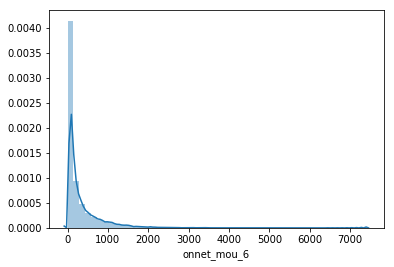

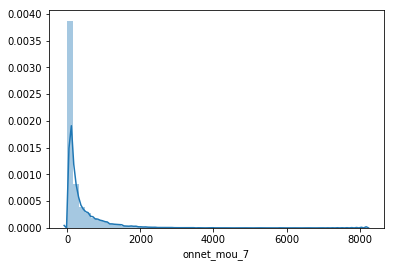

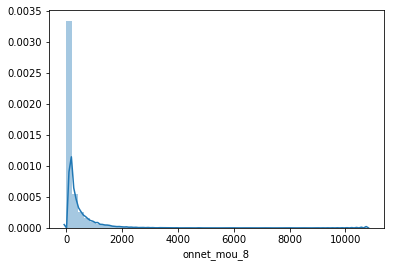

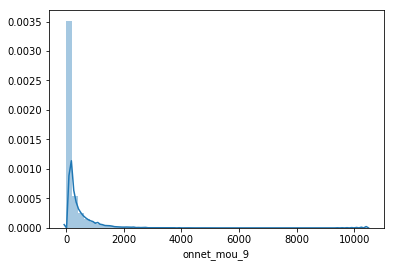

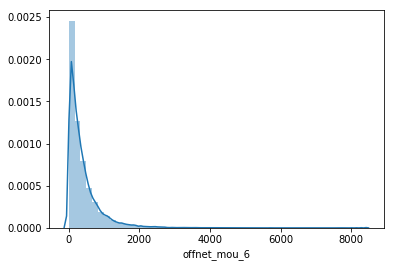

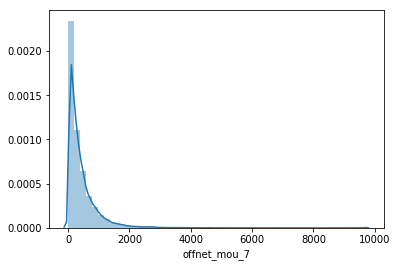

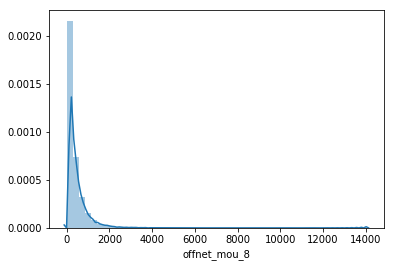

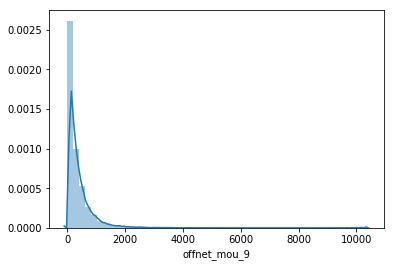

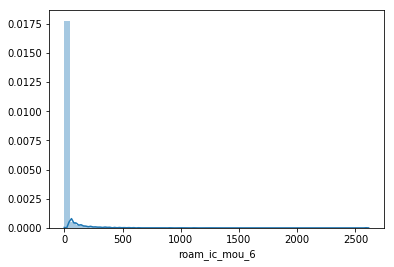

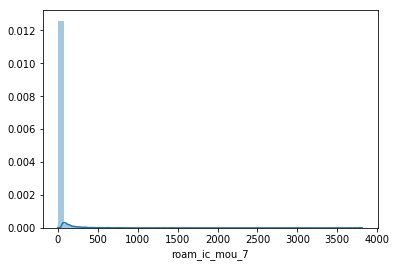

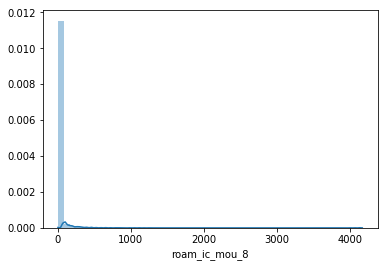

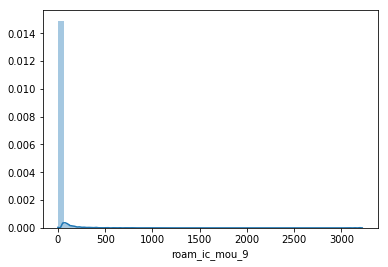

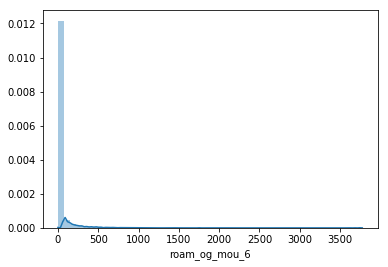

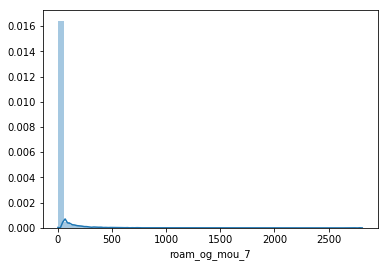

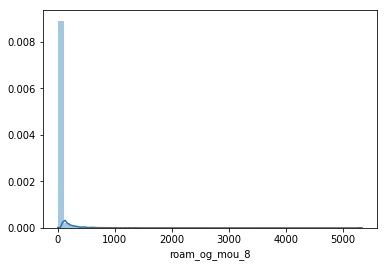

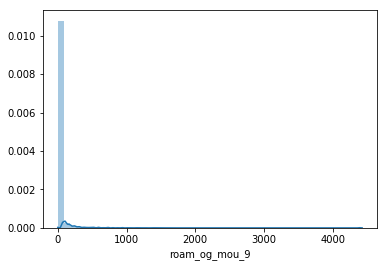

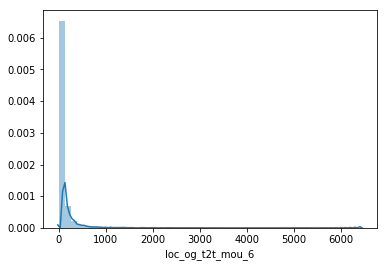

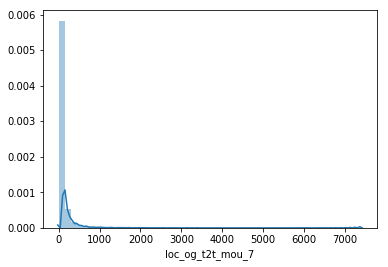

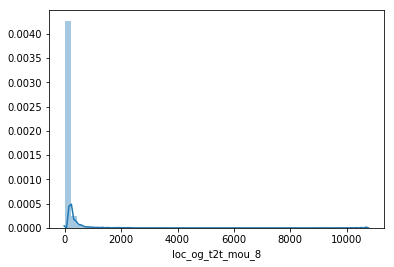

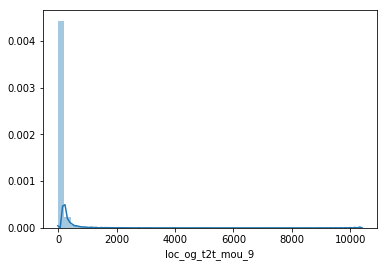

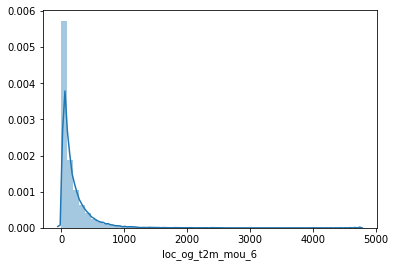

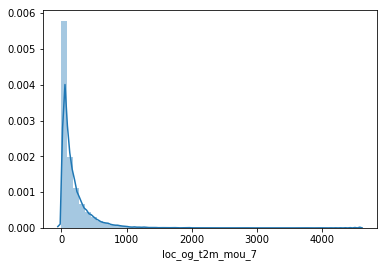

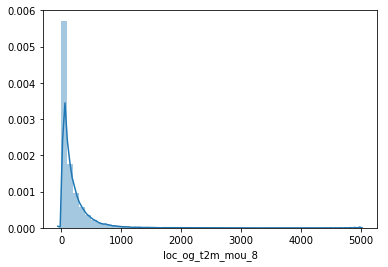

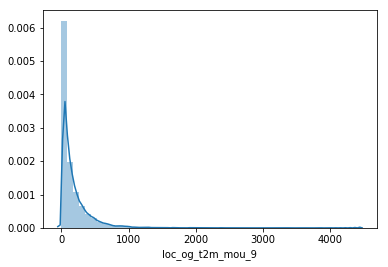

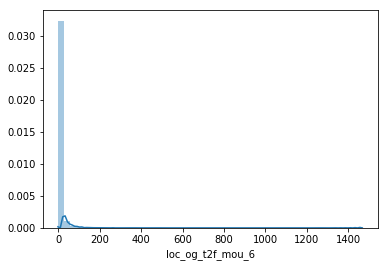

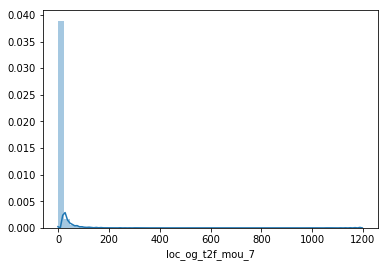

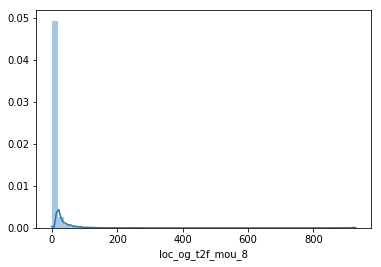

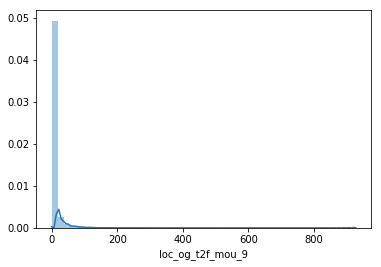

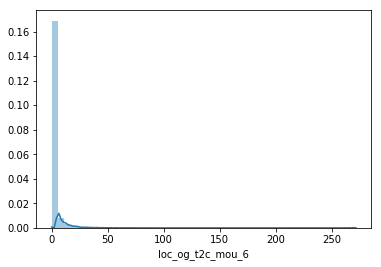

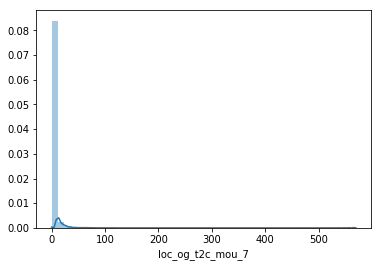

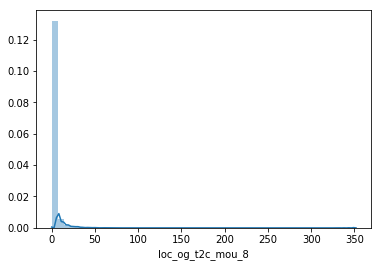

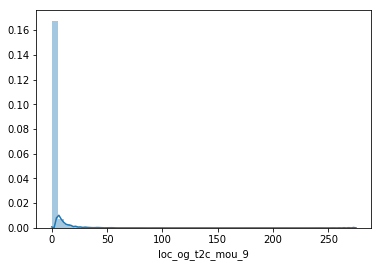

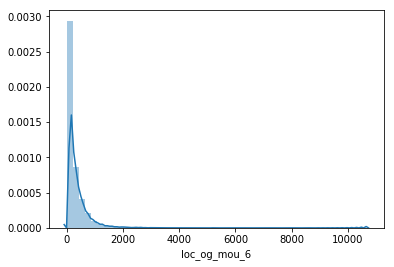

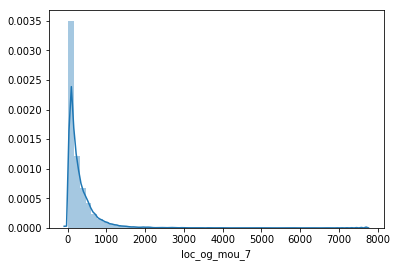

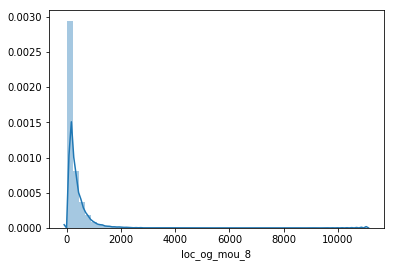

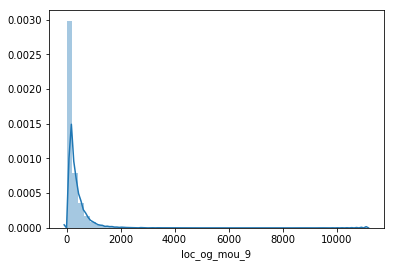

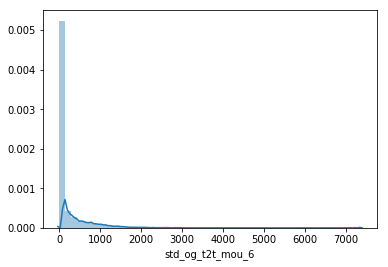

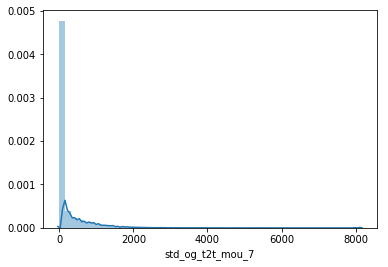

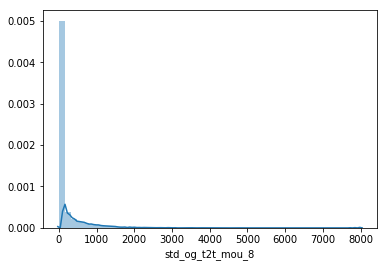

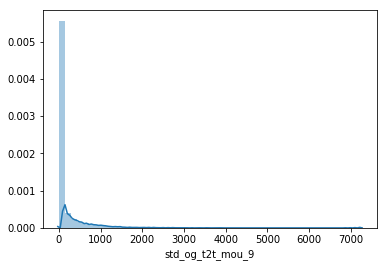

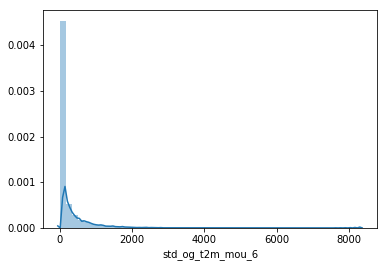

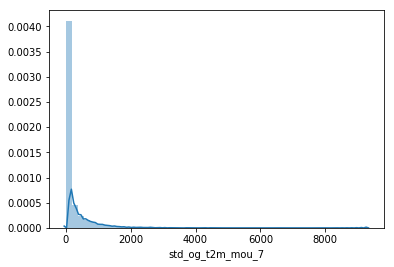

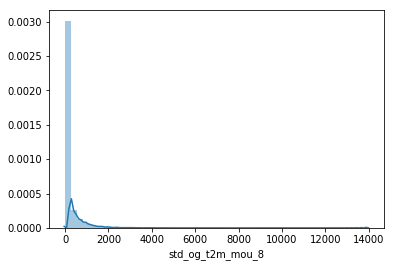

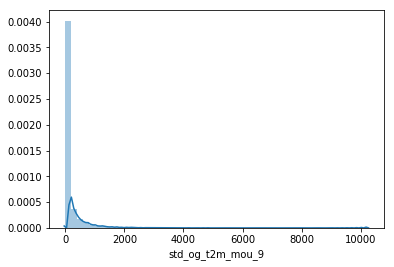

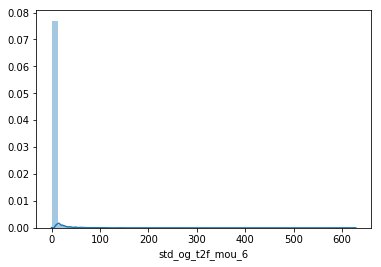

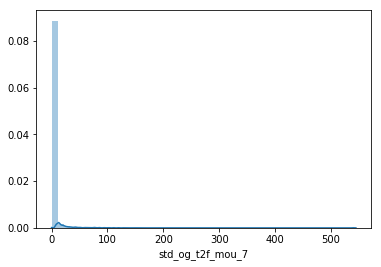

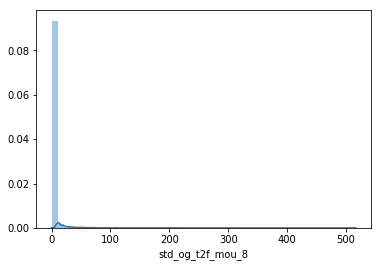

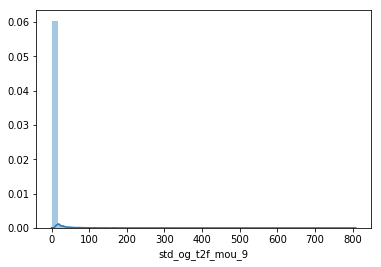

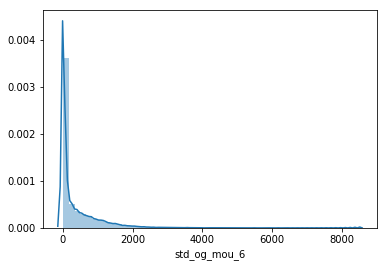

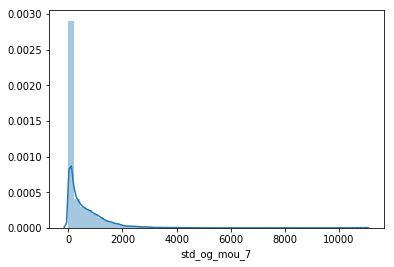

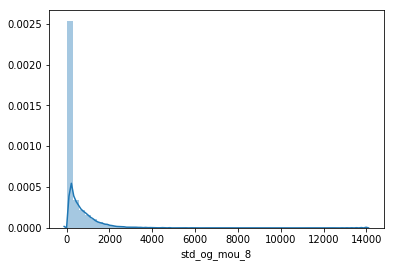

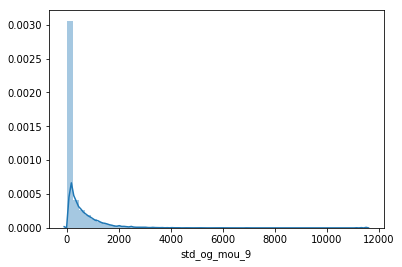

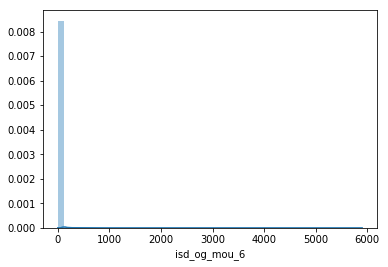

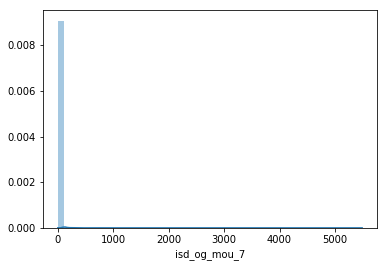

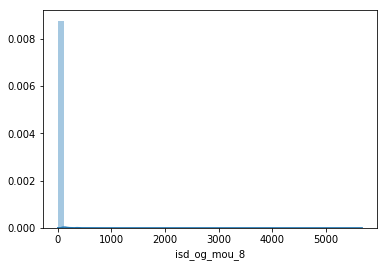

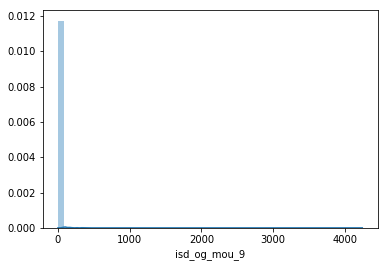

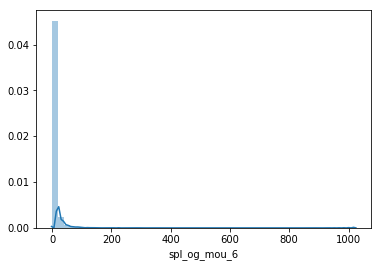

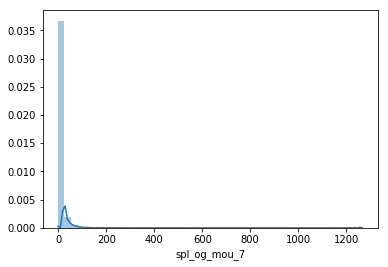

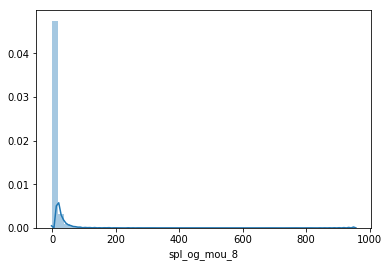

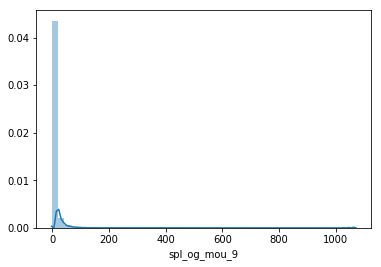

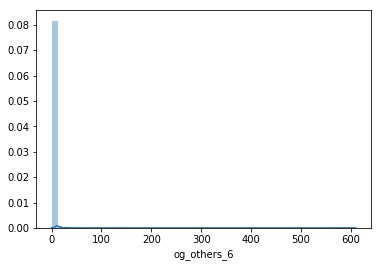

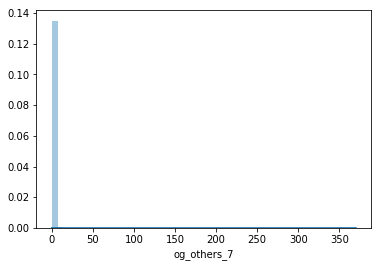

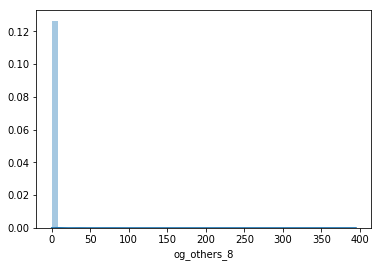

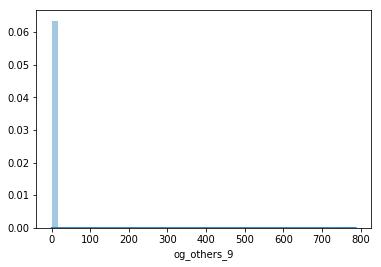

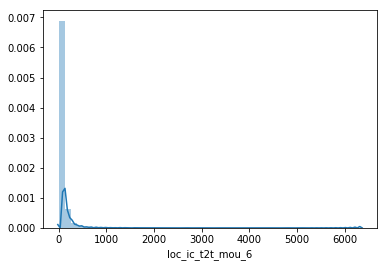

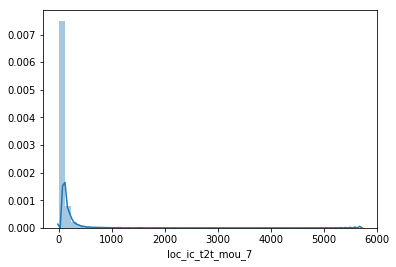

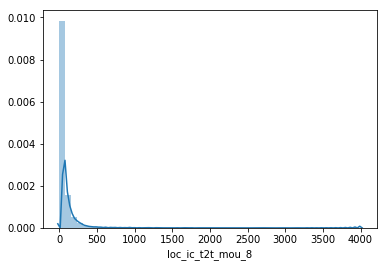

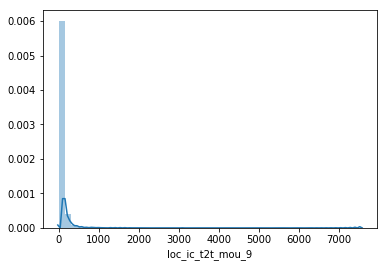

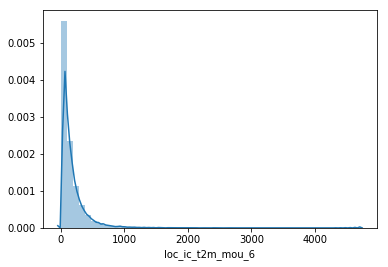

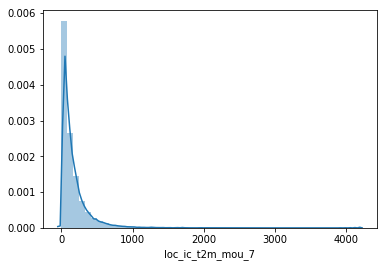

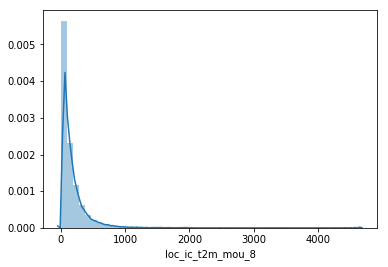

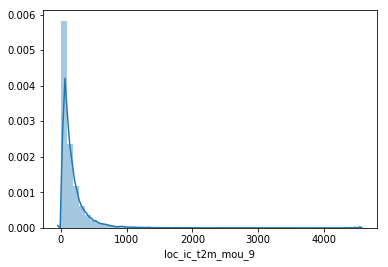

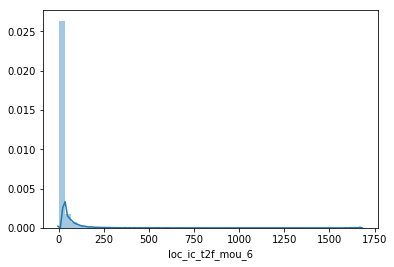

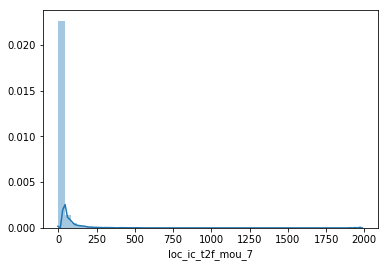

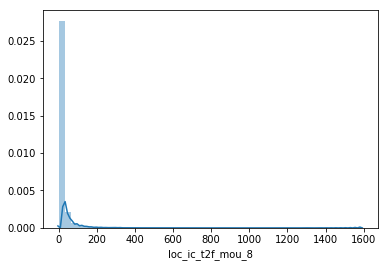

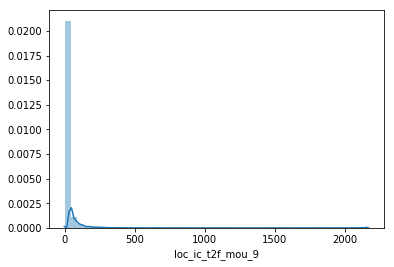

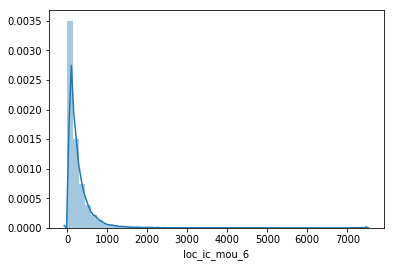

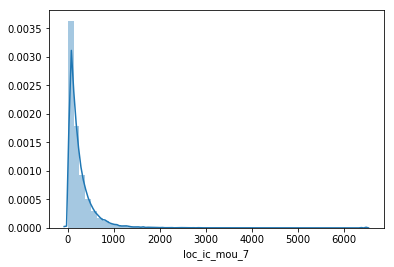

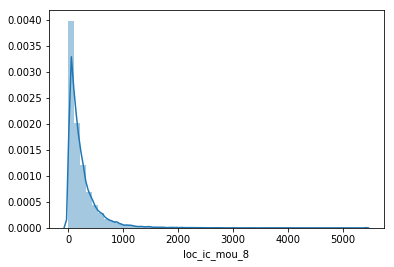

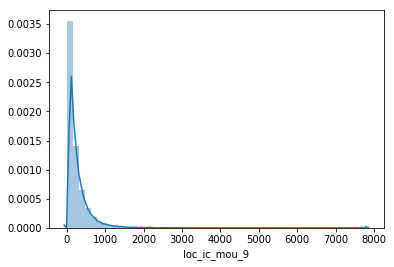

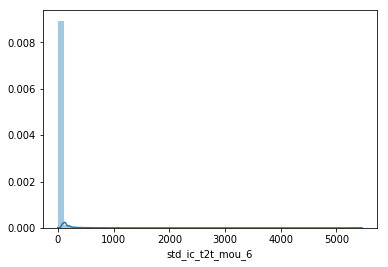

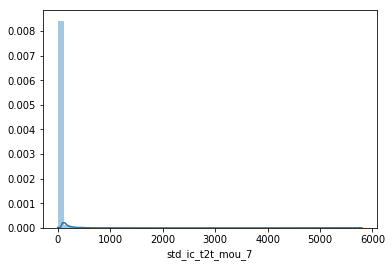

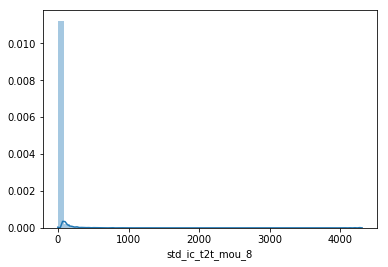

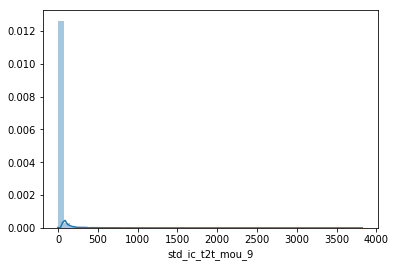

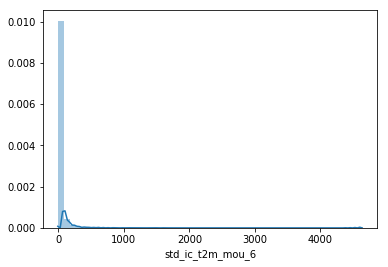

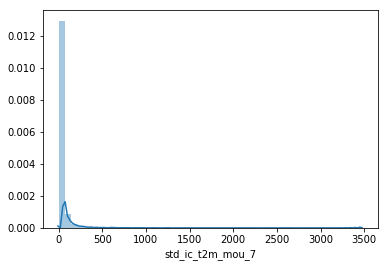

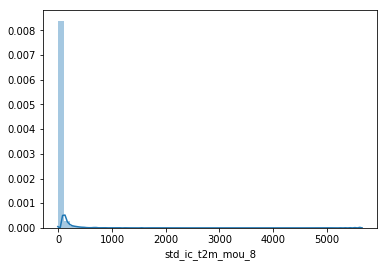

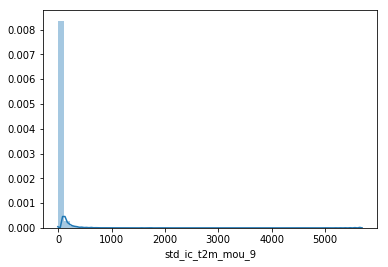

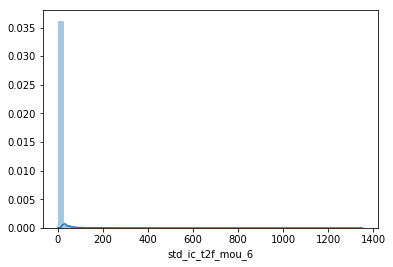

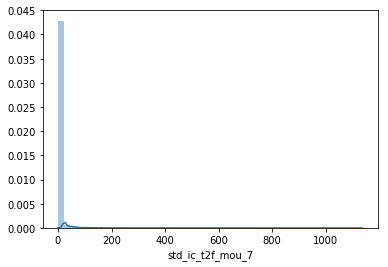

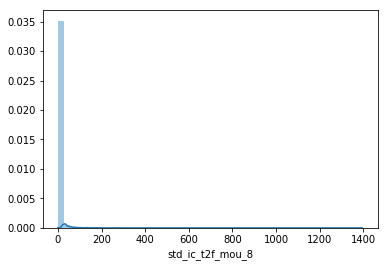

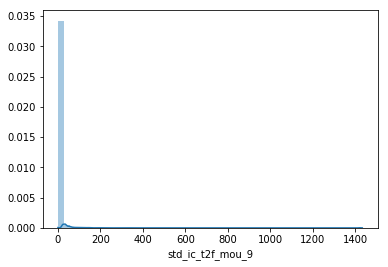

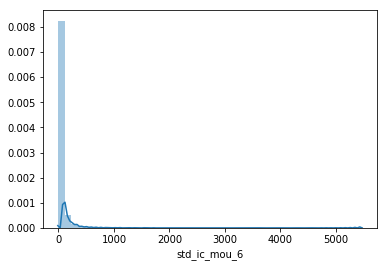

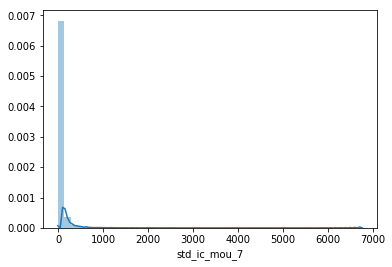

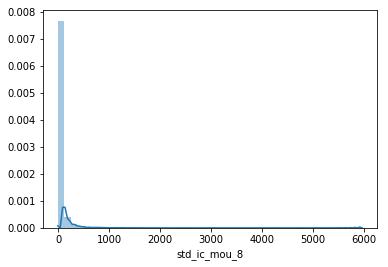

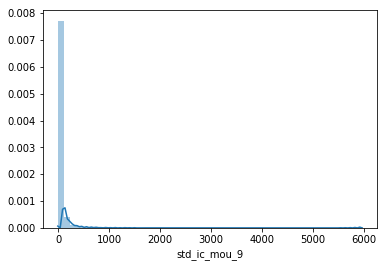

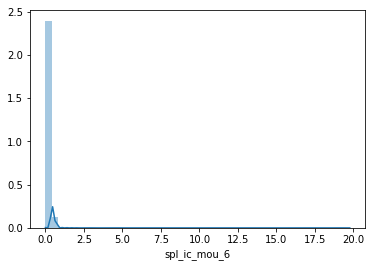

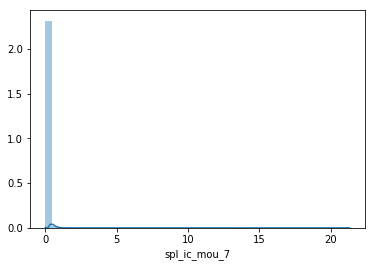

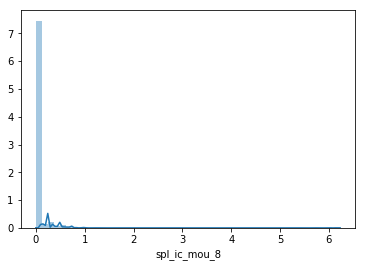

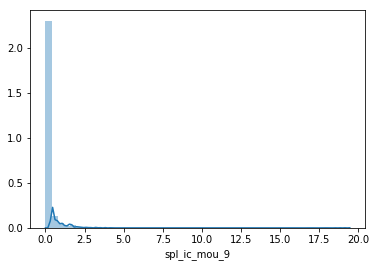

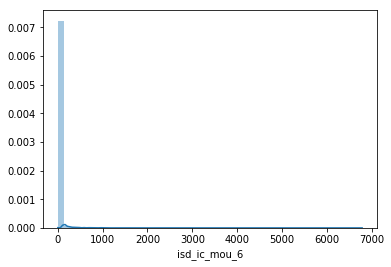

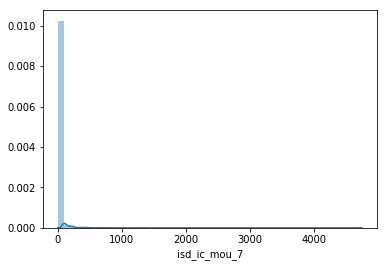

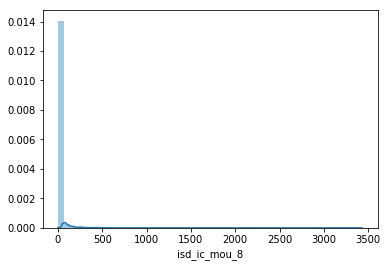

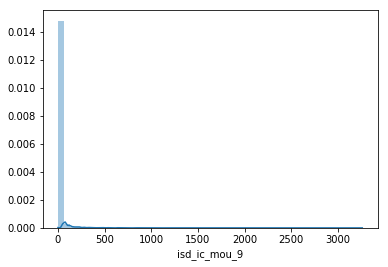

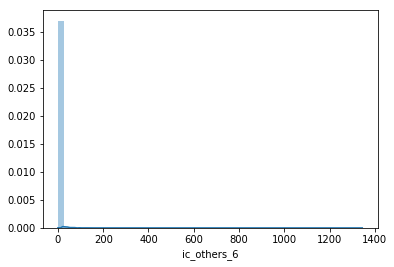

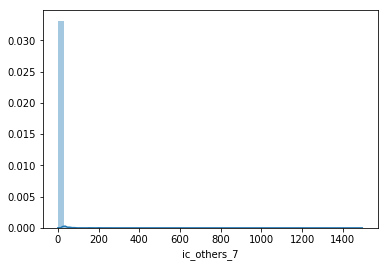

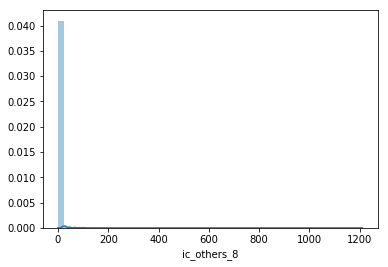

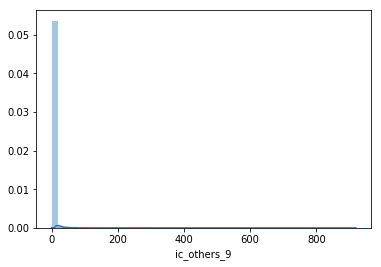

In [60]:
dates=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']
for i, col in enumerate(col_with_null):
    if(col not in dates):
        plt.figure(i)
        sns.distplot(telecom_hv_df[~telecom_hv_df[col].isnull()][col])

In [66]:
from scipy import stats
dates=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']
for i, col in enumerate(col_with_null):
    if(col not in dates):
        telecom_temp = telecom_hv_df[~telecom_hv_df[col].isnull()]
        print(col,stats.mode(telecom_temp[col])[0],np.median(telecom_temp[col]))

onnet_mou_6 [0.] 88.06
onnet_mou_7 [0.] 86.88499999999999
onnet_mou_8 [0.] 72.93
onnet_mou_9 [0.] 65.34
offnet_mou_6 [0.] 229.635
offnet_mou_7 [0.] 227.12
offnet_mou_8 [0.] 197.59
offnet_mou_9 [0.] 178.185
roam_ic_mou_6 [0.] 0.0
roam_ic_mou_7 [0.] 0.0
roam_ic_mou_8 [0.] 0.0
roam_ic_mou_9 [0.] 0.0
roam_og_mou_6 [0.] 0.0
roam_og_mou_7 [0.] 0.0
roam_og_mou_8 [0.] 0.0
roam_og_mou_9 [0.] 0.0
loc_og_t2t_mou_6 [0.] 25.58
loc_og_t2t_mou_7 [0.] 25.78
loc_og_t2t_mou_8 [0.] 23.24
loc_og_t2t_mou_9 [0.] 21.74
loc_og_t2m_mou_6 [0.] 80.24
loc_og_t2m_mou_7 [0.] 81.685
loc_og_t2m_mou_8 [0.] 74.54
loc_og_t2m_mou_9 [0.] 71.23
loc_og_t2f_mou_6 [0.] 0.11
loc_og_t2f_mou_7 [0.] 0.21
loc_og_t2f_mou_8 [0.] 0.0
loc_og_t2f_mou_9 [0.] 0.0
loc_og_t2c_mou_6 [0.] 0.0
loc_og_t2c_mou_7 [0.] 0.0
loc_og_t2c_mou_8 [0.] 0.0
loc_og_t2c_mou_9 [0.] 0.0
loc_og_mou_6 [0.] 129.35000000000002
loc_og_mou_7 [0.] 132.73
loc_og_mou_8 [0.] 120.86
loc_og_mou_9 [0.] 115.25
std_og_t2t_mou_6 [0.] 3.36
std_og_t2t_mou_7 [0.] 3.3
std_og_t2t

In [67]:
##Either impute or drop the values
for col in col_with_null:
    #telecom_hv_df = telecom_hv_df[~telecom_hv_df[col].isnull()]
    telecom_hv_df[col].fillna(value=0,inplace=True)
print(telecom_hv_df.shape)
print(round((telecom_hv_df.shape[0]/30001)*100,2))

(30001, 180)
100.0


In [68]:
col_with_null = telecom_hv_df.columns[telecom_hv_df.isna().any()].tolist()
print(col_with_null)

[]


In [69]:
#Calculating the total churn %
ChurnPct = round(100*(telecom_hv_df["churn"].sum()/len(telecom_hv_df.index)), 2)
print("% of high-value churn customers: ",ChurnPct)

% of high-value churn customers:  8.14


In [70]:
print(list(telecom_hv_df.select_dtypes(include=['object']).columns))

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [71]:
dates=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']
for col_date in dates:
    telecom_hv_df[col_date] = pd.to_datetime(telecom_hv_df[col_date])

In [73]:
telecom_hv_df['days_last_rech_6']=telecom_hv_df.date_of_last_rech_6.dt.day
telecom_hv_df['days_last_rech_7']=telecom_hv_df.date_of_last_rech_7.dt.day
telecom_hv_df['days_last_rech_8']=telecom_hv_df.date_of_last_rech_8.dt.day
telecom_hv_df['days_last_rech_9']=telecom_hv_df.date_of_last_rech_9.dt.day

In [74]:
telecom_hv_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_data_amt_6,total_recharge_data_amt_7,total_recharge_data_amt_8,total_recharge_data_amt_9,net_recharge_amt_6,net_recharge_amt_7,net_recharge_amt_8,net_recharge_amt_9,avg_rech_amt_6_7,churn,days_last_rech_6,days_last_rech_7,days_last_rech_8,days_last_rech_9
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,0.0,614.0,504.0,504.0,0.0,559.0,1,21,16,8,28
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.